<a href="https://colab.research.google.com/github/joybratas1/Time_Series_Basics_Maruti_Stock/blob/main/Maruti_Stock_Price_Basic_TS_Analysis_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os



import missingno as msno 
This library Handles the missing Values in a Dataset.

In [3]:
pip install opendatasets --upgrade --quiet

In [9]:
import opendatasets as od
url_l='https://www.kaggle.com/rohanrao/nifty50-stock-market-data'
od.download(url_l)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joybratasarkar
Your Kaggle Key: ··········


 27%|██▋       | 5.00M/18.4M [00:00<00:00, 27.7MB/s]

100%|██████████| 18.4M/18.4M [00:00<00:00, 54.7MB/s]


In [10]:
file_name='/content/nifty50-stock-market-data/MARUTI.csv'

In [64]:
df= pd.read_csv(file_name)
df.dataframeName = 'district wise rainfall normal.csv'
nRow, nCol = df.shape
print('There are {} rows and {} columns in our Dataset'.format(nRow,nCol))

There are 4427 rows and 15 columns in our Dataset


In [65]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835528e+14,NaN,8537695.0,0.2428
1,2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14,NaN,4363947.0,0.4170
2,2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024622e+14,NaN,3014852.0,0.2568
3,2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.064313e+14,NaN,1949217.0,0.3258
4,2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.092001e+14,NaN,1307694.0,0.2118


Defaulters Response Variable

In [66]:
mis_val = df.isnull().sum()
print(mis_val)
100 * df.isnull().sum() / len(df)

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1971
Deliverable Volume       1
%Deliverble              1
dtype: int64


Date                   0.000000
Symbol                 0.000000
Series                 0.000000
Prev Close             0.000000
Open                   0.000000
High                   0.000000
Low                    0.000000
Last                   0.000000
Close                  0.000000
VWAP                   0.000000
Volume                 0.000000
Turnover               0.000000
Trades                44.522250
Deliverable Volume     0.022589
%Deliverble            0.022589
dtype: float64

**pd**.concat([mis_val, (100 * df.isnull().sum() / len(df))], axis=1, mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

In [67]:
table =pd.concat([mis_val, (100 * df.isnull().sum() / len(df))], axis=1) 
table.rename( columns = {0 : 'Missing Values', 1 : '% of Total Values'})

,Missing Values,% of Total Values
Date,0,0.000000
Symbol,0,0.000000
Series,0,0.000000
Prev Close,0,0.000000
Open,0,0.000000
High,0,0.000000
Low,0,0.000000
Last,0,0.000000
Close,0,0.000000
VWAP,0,0.000000


In [68]:
table.rename( columns = {0 : 'Missing Values', 1 : '% of Total Values'})

,Missing Values,% of Total Values
Date,0,0.000000
Symbol,0,0.000000
Series,0,0.000000
Prev Close,0,0.000000
Open,0,0.000000
High,0,0.000000
Low,0,0.000000
Last,0,0.000000
Close,0,0.000000
VWAP,0,0.000000


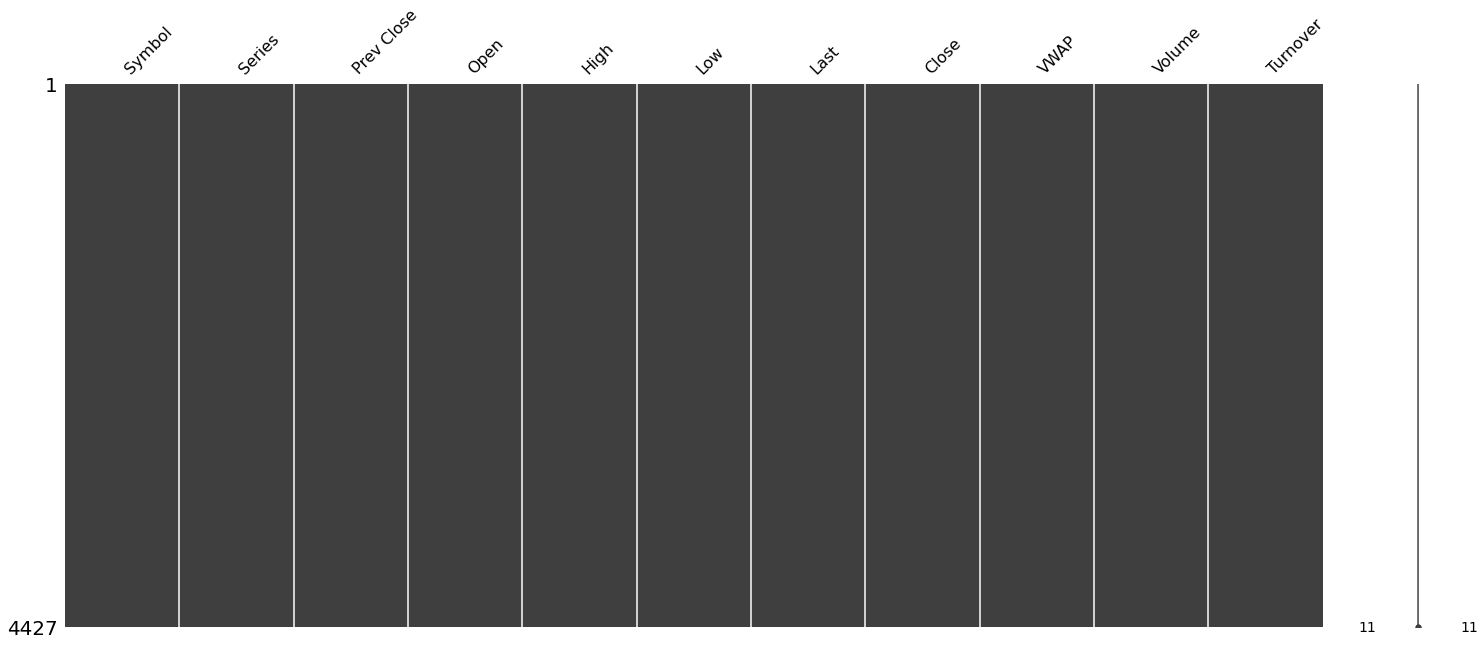

In [139]:
msno.matrix(df)

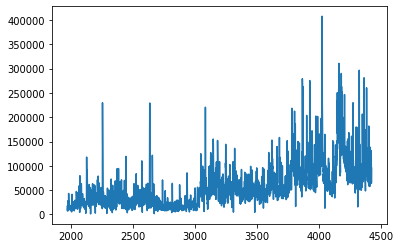

In [70]:
df.Trades.plot()

## Dropping the Columns with missing values


In [71]:
df.drop(['Trades','Deliverable Volume','%Deliverble'],axis=1,inplace=True)

##Statistical Description of Mean, Deviation etc.

In [72]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
count,4427.000000,4427.000000,4427.000000,4427.000000,4427.000000,4427.000000,4427.000000,4.427000e+03,4.427000e+03
mean,2923.575085,2927.873074,2962.918432,2889.128066,2924.651604,2925.005094,2926.480642,1.194661e+06,2.395307e+14
std,2740.532701,2745.541243,2769.986950,2715.403311,2740.438635,2740.723734,2742.675329,1.637957e+06,2.935761e+14
min,125.000000,164.000000,168.700000,155.000000,164.000000,164.300000,165.060000,2.279600e+04,2.131518e+12
25%,822.525000,825.100000,840.000000,806.300000,823.025000,822.700000,823.435000,4.263710e+05,6.248277e+13
50%,1412.450000,1414.000000,1432.000000,1390.350000,1412.200000,1412.600000,1412.210000,6.909590e+05,1.121591e+14
75%,5097.350000,5100.000000,5192.050000,5006.025000,5104.500000,5104.200000,5114.920000,1.208280e+06,3.141731e+14
max,9832.450000,9966.000000,9996.400000,9725.000000,9846.000000,9832.450000,9850.960000,3.516428e+07,4.878992e+15


In [73]:
df.shape

(4427, 12)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4427 entries, 0 to 4426
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        4427 non-null   object 
 1   Symbol      4427 non-null   object 
 2   Series      4427 non-null   object 
 3   Prev Close  4427 non-null   float64
 4   Open        4427 non-null   float64
 5   High        4427 non-null   float64
 6   Low         4427 non-null   float64
 7   Last        4427 non-null   float64
 8   Close       4427 non-null   float64
 9   VWAP        4427 non-null   float64
 10  Volume      4427 non-null   int64  
 11  Turnover    4427 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 415.2+ KB


In [75]:
# Convert string to datetime64
df['Date'] = df['Date'].apply(pd.to_datetime)
df.set_index('Date',inplace=True)
df.head()




,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
Date,,,,,,,,,,,
2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835528e+14
2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14
2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024622e+14
2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.064313e+14
2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.092001e+14


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4427 entries, 2003-07-09 to 2021-04-30
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      4427 non-null   object 
 1   Series      4427 non-null   object 
 2   Prev Close  4427 non-null   float64
 3   Open        4427 non-null   float64
 4   High        4427 non-null   float64
 5   Low         4427 non-null   float64
 6   Last        4427 non-null   float64
 7   Close       4427 non-null   float64
 8   VWAP        4427 non-null   float64
 9   Volume      4427 non-null   int64  
 10  Turnover    4427 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 415.0+ KB


Text(0, 0.5, 'VWAP')

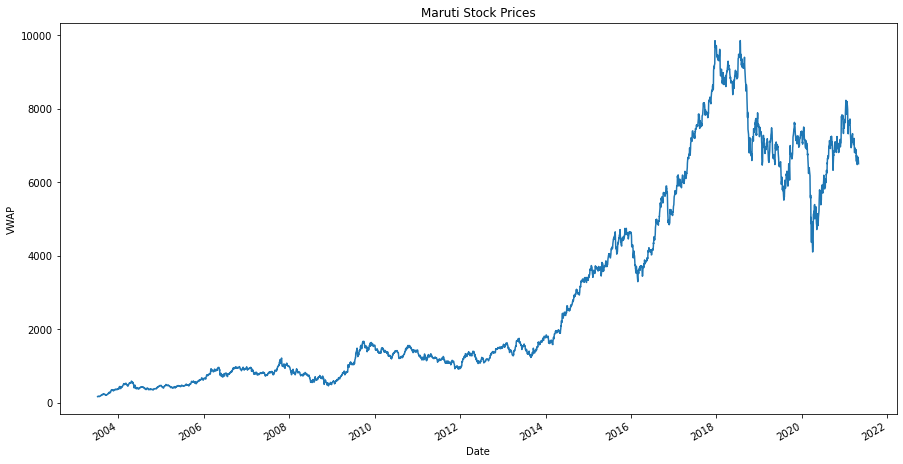

In [85]:
df['VWAP'].plot(figsize=(15,8),title='Maruti Stock Prices')
plt.ylabel('VWAP')

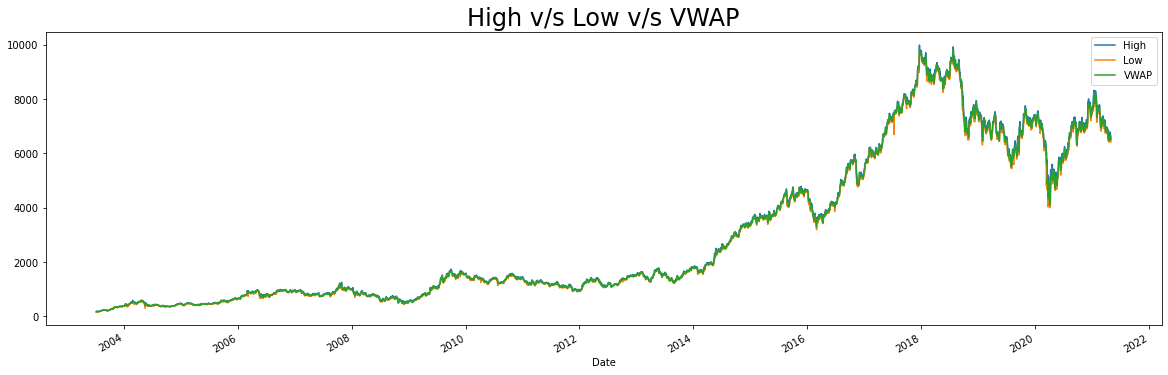

In [83]:
ax = df[['High', 'Low','VWAP']].plot(figsize=(20, 6))
ax.set_title('High v/s Low v/s VWAP', fontsize=24);


## Taking the VWAP and DATE column for working on Monthly data

In [94]:
df1= df[['VWAP','Volume','Turnover']].copy()
df1

,VWAP,Volume,Turnover
Date,,,
2003-07-09,165.95,35164283,5.835528e+14
2003-07-10,166.74,10464179,1.744820e+14
2003-07-11,172.45,11740117,2.024622e+14
2003-07-14,177.91,5982324,1.064313e+14
2003-07-15,176.88,6173689,1.092001e+14
...,...,...,...
2021-04-26,6678.34,937344,6.259903e+14
2021-04-27,6620.68,1610651,1.066360e+15
2021-04-28,6598.62,1406270,9.279437e+14


USE THIS- df.groupby('month')['VWAP'].mean()
To get the Mean of Months when The Date is a column instead of Index.

In [106]:
frame =df1.resample("M").mean()
frame.head()


,VWAP,Volume,Turnover
Date,,,
2003-07-31,174.023529,7.626945e+06,1.310442e+14
2003-08-31,213.644500,5.382969e+06,1.129834e+14
2003-09-30,219.936818,2.805994e+06,6.153379e+13
2003-10-31,270.904348,4.271722e+06,1.187998e+14
2003-11-30,339.089000,5.243456e+06,1.777833e+14


Text(0, 0.5, 'VWAP')

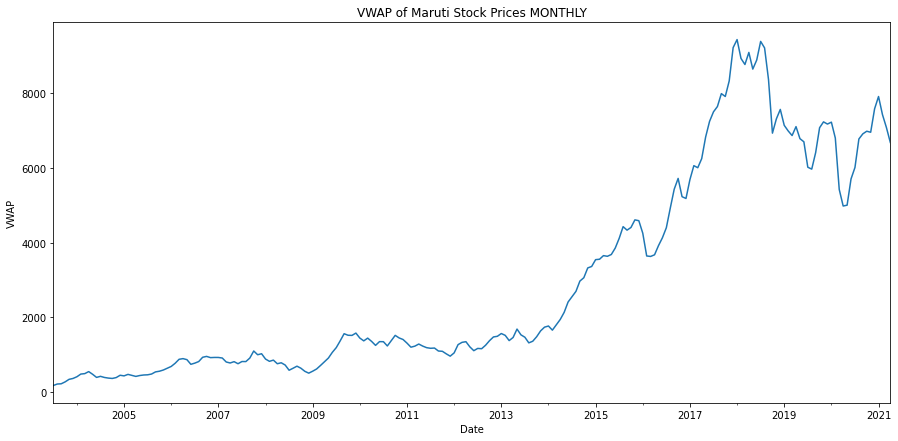

In [124]:
frame['VWAP'].plot(figsize=(15,7),title='VWAP of Maruti Stock Prices MONTHLY')
plt.ylabel('VWAP')

##Kernel Density Plot for getting the distribution of VWAP

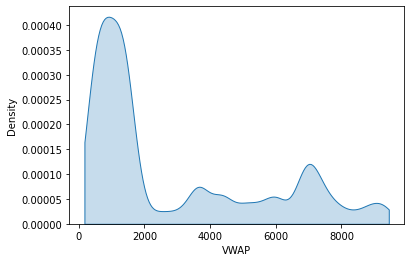

In [132]:
sns.kdeplot(frame['VWAP'],shade=True, bw_adjust=0.3, cut=0)   

Rolling Windows to remove Fluctuations in the data.

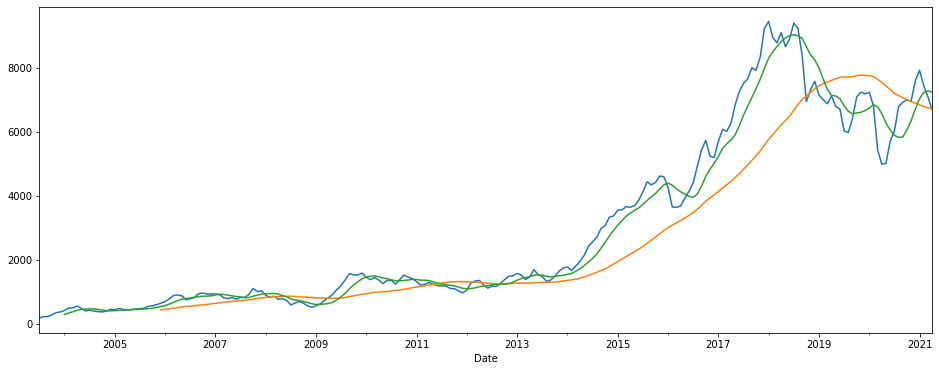

In [147]:
frame['VWAP'].plot()
frame.rolling(window=30).mean()['VWAP'].plot(figsize=(16, 6))
frame.rolling(7).mean()['VWAP'].plot(figsize=(16, 6))

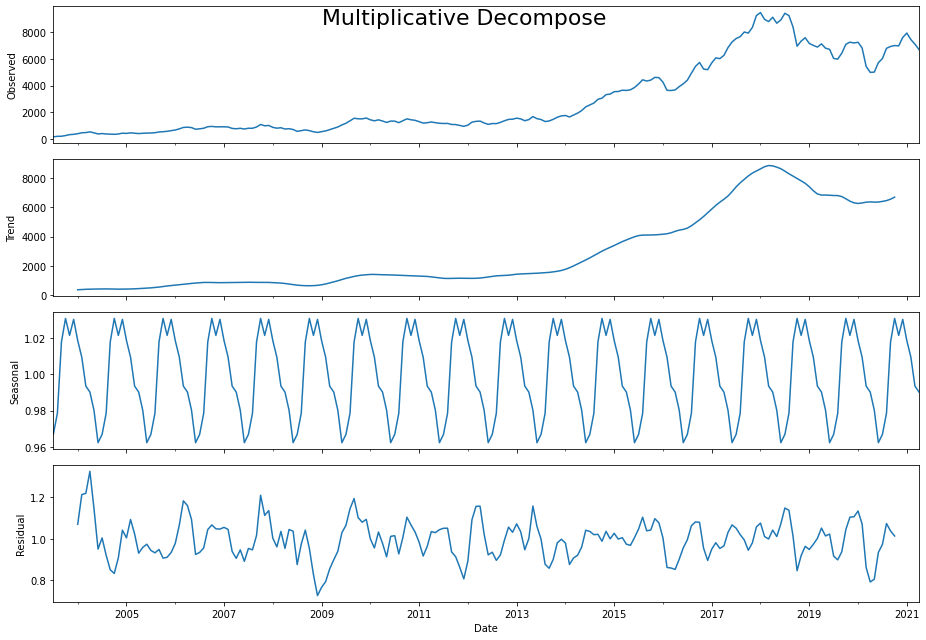

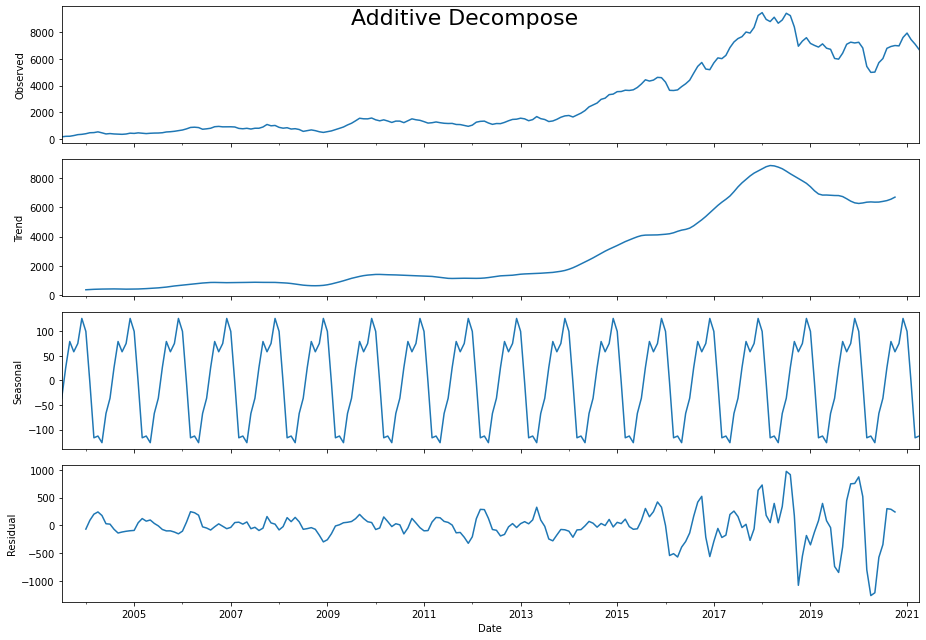

In [173]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
plt.rcParams.update({'figure.figsize': (13,9)})
#Multiplicative
seasonal_decompose(frame['VWAP'], model='multiplicative').plot().suptitle('Multiplicative Decompose', fontsize=22)
#Additive
seasonal_decompose(frame['VWAP'], model='additive').plot().suptitle('Additive Decompose', fontsize=22);



There is clearly an upward trend in the above plot.
You can also see the uniform seasonal change.    
  The data is non-stationary. But we will check it with a test.

Stationarity Test Using DIcky-Fuller Test.

In [179]:
from statsmodels.tsa.stattools import adfuller
def dicky_fuller_test(x):
    result = adfuller(x)
    print('ADF Test Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1]>0.05:
        print("Fail to reject the null hypothesis (H0), the data is non-stationary")
    else:
        print("Reject the null hypothesis (H0), the data is stationary.")


In [180]:
dicky_fuller_test(frame['VWAP'])

ADF Test Statistic: -0.650521
p-value: 0.859153
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
Fail to reject the null hypothesis (H0), the data is non-stationary


In [ ]:
##Differencing Transformation.

In [219]:
frame['vwap_diff']=frame['VWAP']-frame['VWAP'].shift(1)

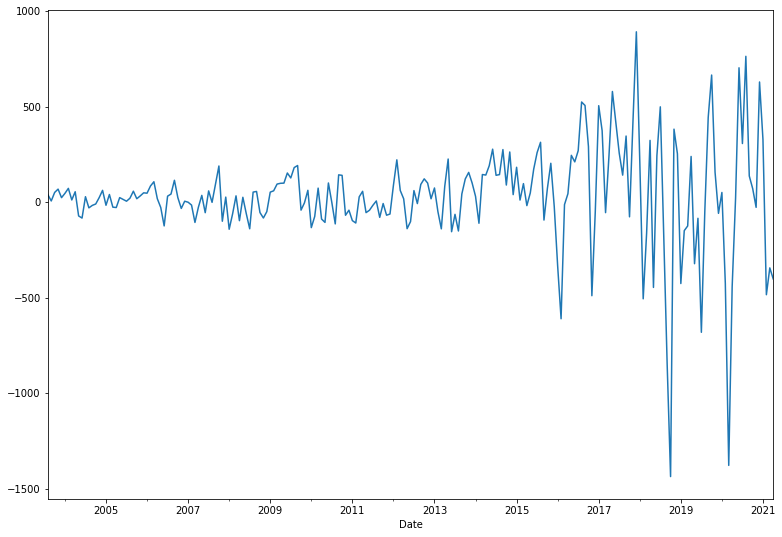

In [220]:
frame['vwap_diff'].dropna().plot()

In [207]:
frame['vwap_diff'].isna()

Date
2003-07-31     True
2003-08-31     True
2003-09-30     True
2003-10-31     True
2003-11-30     True
              ...  
2020-12-31    False
2021-01-31    False
2021-02-28    False
2021-03-31    False
2021-04-30    False
Freq: M, Name: vwap_diff, Length: 214, dtype: bool

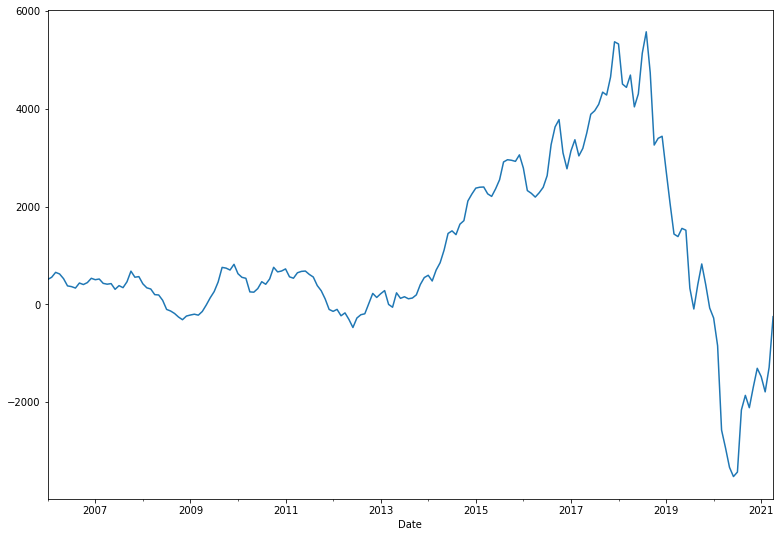

In [214]:
frame['vwap_diff'].dropna().plot()


In [216]:
diff1 = frame['VWAP'].diff()


In [218]:
dicky_fuller_test(diff1.dropna())

ADF Test Statistic: -3.481869
p-value: 0.008465
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
Reject the null hypothesis (H0), the data is stationary.
